# Animation for different datasets

## 1. Load of  packages, modules and data

### 1.1. Loading the necessary packages

In [56]:
#import dask
import re
import os
import importlib
import timeit
import sys
import numpy as np
import xarray

### Function, which reads the status of the user in the slurm queue 

In [4]:
def squeue_user(username = "$USER"):
    _squeue_user = os.system("squeue --user="+str(username))
    return _squeue_user 

#### Setting the path to the diagnostic repository 

In [5]:
with os.popen("pwd ") as f:
    _pwd = f.readline()

pwd = re.split(r'[\n]', _pwd)[0]

### 1.2. Loading the written modules

In [6]:
sys.path.append(str(pwd)+'/../')

import src.tr_pr_module
import src.time_functions
import src.graphic_creator
import src.slurm_job

#### Loading the pakcage which create the animation and images

In [73]:
importlib.reload(src.graphic_creator)
from src.graphic_creator import  animation_creator, image_creator, lon_lat_regrider

#### Loading the time-related functions, which can be used in any diagnostic

In [72]:
importlib.reload(src.time_functions)
from  src.time_functions import time_interpreter, estimated_total_calc_time, optimal_amount_of_timesteps, time_regrider

#### Activating the slurm job if it is necessary 

In [10]:
importlib.reload(src.slurm_job)
from  src.slurm_job import  slurm_interactive_job, squeue_user, scancel

In [ ]:
slurm_interactive_job()

In [12]:
squeue_user()

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
           4780058   compute dask-wor  b382267 PD       0:00      1 (Priority)


0

#### Importing the aqua module

In [13]:
import aqua
from aqua import Reader
from aqua.reader import catalogue

In [15]:
configdir = '../../../config/'
diagname  = 'tr_pr'
machine   = 'levante'
catalogue(configdir=configdir)

levante:
  args:
    path: ../../../config//levante/catalog.yaml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


### 1.3. Loading the data with the use of aqua package

In [28]:
reader = Reader(model="ICON", exp="ngc2009",  configdir=configdir, source="atm_2d_ml_R02B09", regrid="r200")
ICON = reader.retrieve()

In [59]:
ICON['mtnsrf']

<xarray.DataArray 'mtnsrf' (time: 37009, cell: 20971520)>
dask.array<transpose, shape=(37009, 20971520), dtype=float32, chunksize=(6, 1048576), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20 2020-01-20T00:30:00 ... 2022-03-01
Dimensions without coordinates: cell
Attributes: (12/13)
    CDI_grid_type:                unstructured
    cell_methods:                 t: mean
    level_type:                   toa
    long_name:                    Mean top net solar radiation flux
    number_of_grid_in_reference:  1
    param:                        201.4.0
    ...                           ...
    units:                        W m-2
    history:                      2023-04-17 20:58:12 variable derived by AQU...
    paramId:                      172178
    cfVarName:                    mtnsrf
    shortName:                    mtnsrf
    derived:                      rsdt-rsut

In [76]:
var='skt'
ICON_chunk_regrided = reader.regrid(ICON[var][10:100,:])
ICON_chunk_regrided = ICON_chunk_regrided.compute()

In [31]:
time_interpreter(ICON)

'30m'

In [ ]:
#vmin = 240, vmax = 320,

...........Done!


True

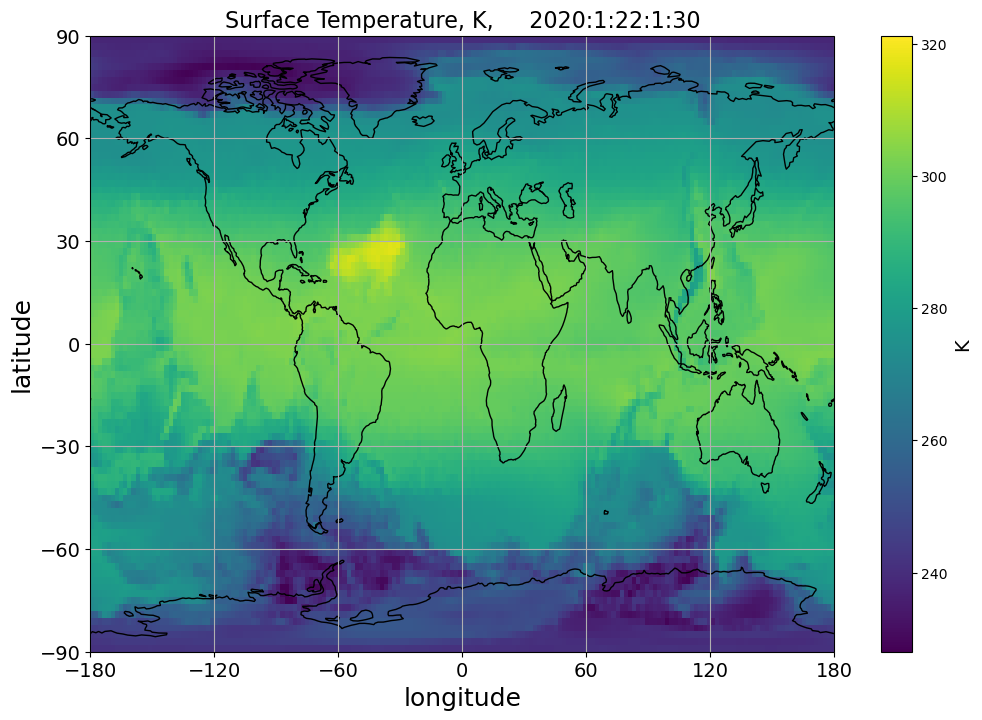

In [77]:
animation_creator(ICON_chunk_regrided,  trop_lat = 90,  title ='Surface Temperature, K',nSeconds = 10, label = 'ICON_'+str(var), resol = '110m')

In [78]:
var='tcwv'
ICON_chunk_regrided = reader.regrid(ICON[var][10:100,:])
ICON_chunk_regrided = ICON_chunk_regrided.compute()

...........Done!


True

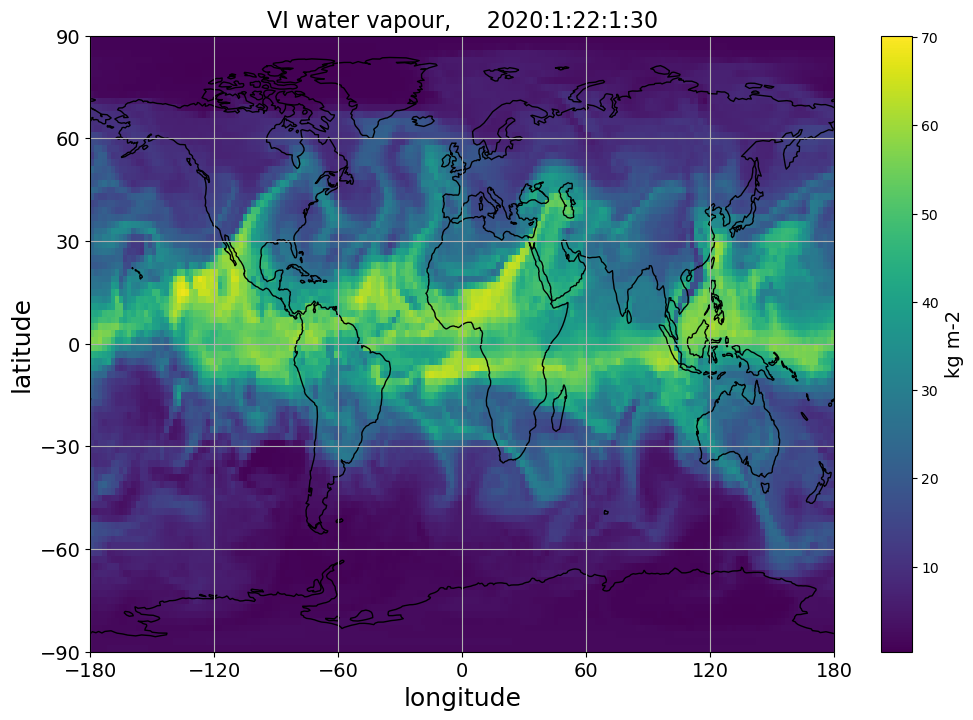

In [79]:
animation_creator(ICON_chunk_regrided,   trop_lat = 90,  title ='VI water vapour',nSeconds = 10, label = 'ICON_'+str(var), resol = '110m')

In [85]:
var='rpds_dif'
ICON_chunk_regrided = reader.regrid(ICON[var][10:100,:])
ICON_chunk_regrided = ICON_chunk_regrided.compute()

...........Done!


True

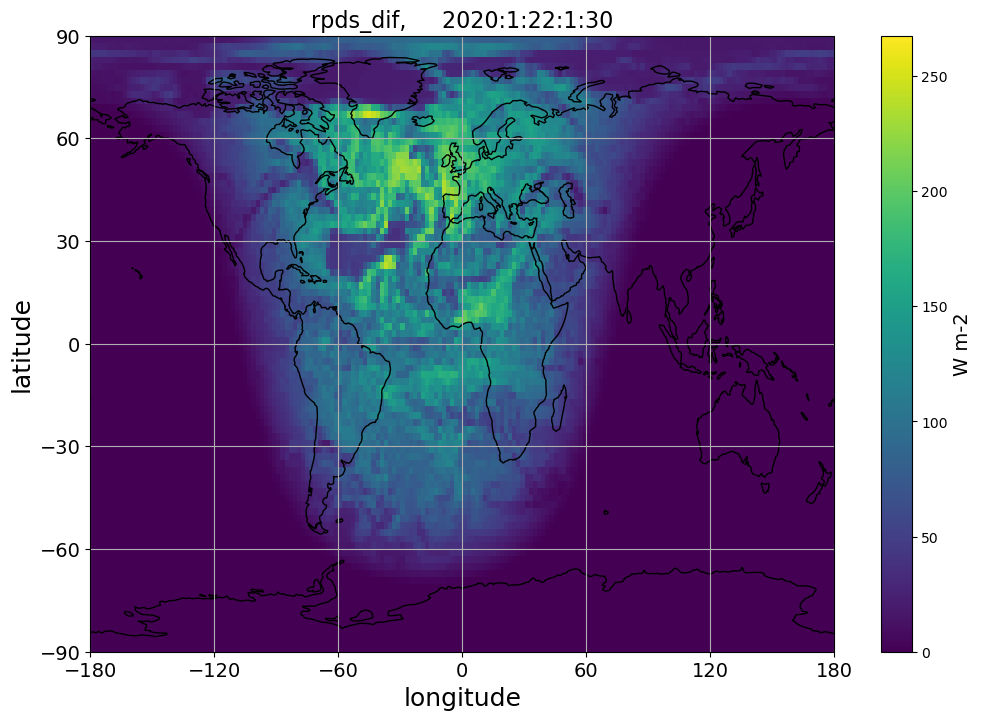

In [86]:
animation_creator(ICON_chunk_regrided,   trop_lat = 90,  title ='rpds_dif',nSeconds = 10, label = 'ICON_'+str(var), resol = '110m')

In [82]:
var='qgvi'
ICON_chunk_regrided = reader.regrid(ICON[var][10:100,:])
ICON_chunk_regrided = ICON_chunk_regrided.compute()

...........Done!


True

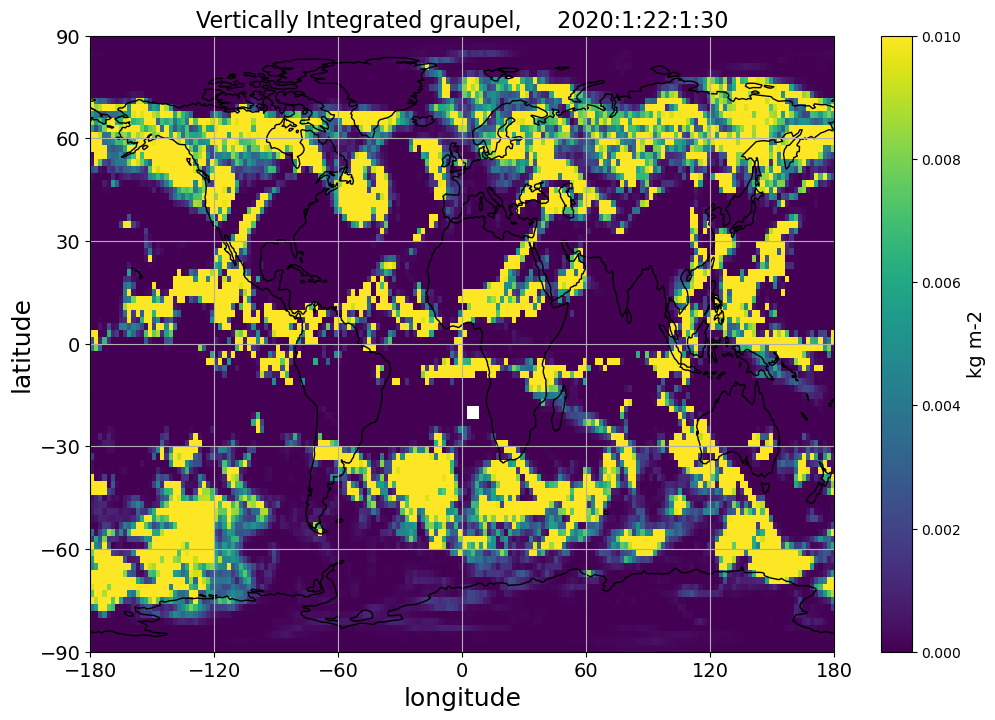

In [84]:
animation_creator(ICON_chunk_regrided,  vmin=0, vmax=10**(-2), trop_lat = 90,  title ='Vertically Integrated graupel',nSeconds = 10, label = 'ICON_'+str(var), resol = '110m')